In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 1. return

In [55]:
# INSTRUCTION:
# change itv to generate results for 0.125, 0.25 ...
#----------------------------------------------------

import glob
interval = ["point125","point25","point5","point75"]
itv = interval[3]
txt_dir = "../SHARCNET/Results/debug/ppo/"+itv+"/"
modes = ["SARA","PLA"]
all_data_files = dict()
for mode in modes:
    mode_data_files = glob.glob(txt_dir+ mode + "/**/" +"*.txt", recursive=True)
    mode_data_files.sort()
    print("{}: {} files found".format(mode,len(mode_data_files)))
    for f in mode_data_files:
        print(f)
    all_data_files[mode]=mode_data_files

SARA: 6 files found
../SHARCNET/Results/debug/ppo/point75/SARA\2019-09-15-140931-1-0\ppo\ppo_s0\progress.txt
../SHARCNET/Results/debug/ppo/point75/SARA\2019-09-15-140934-0-0\ppo\ppo_s0\progress.txt
../SHARCNET/Results/debug/ppo/point75/SARA\2019-09-15-140934-0-1\ppo\ppo_s0\progress.txt
../SHARCNET/Results/debug/ppo/point75/SARA\2019-09-15-140934-1-0\ppo\ppo_s0\progress.txt
../SHARCNET/Results/debug/ppo/point75/SARA\2019-09-15-170815-0-1\ppo\ppo_s0\progress.txt
../SHARCNET/Results/debug/ppo/point75/SARA\2019-09-15-170815-1-0\ppo\ppo_s0\progress.txt
PLA: 4 files found
../SHARCNET/Results/debug/ppo/point75/PLA\2019-09-14-230607-0-0\ppo\ppo_s0\progress.txt
../SHARCNET/Results/debug/ppo/point75/PLA\2019-09-14-231143-1-1\ppo\ppo_s0\progress.txt
../SHARCNET/Results/debug/ppo/point75/PLA\2019-09-15-171349-1-2\ppo\ppo_s0\progress.txt
../SHARCNET/Results/debug/ppo/point75/PLA\2019-09-15-171358-0-0\ppo\ppo_s0\progress.txt


In [56]:
all_combined_data = dict()

for mode in modes:

    mode_data = []
    for file in all_data_files[mode]:
        mode_data.append(pd.read_csv(file, sep="\t"))
        
    metrics = ["AverageEpRet", "AverageVVals"]
    
    mode_combined_data = pd.DataFrame()
    for metric in metrics:
        if metric == "AverageEpRet":
            col_name = "return"
        else:
            col_name = "V_means"
        metric_combined_data = pd.DataFrame()
        for i in range(len(all_data_files[mode])):
            metric_combined_data[col_name+"_run"+str(i)] = mode_data[i][metric]
        metric_combined_data[col_name+"_avg"] = metric_combined_data.mean(axis=1)
        metric_combined_data[col_name+'_std'] = metric_combined_data.std(axis=1)
        
        mode_combined_data = pd.concat([mode_combined_data,metric_combined_data],axis=1)
    all_combined_data[mode] = mode_combined_data

In [57]:
all_combined_data['PLA']

,return_run0,return_run1,return_run2,return_run3,return_avg,return_std,V_means_run0,V_means_run1,V_means_run2,V_means_run3,V_means_avg,V_means_std
0,3.808181,8.609445,7.520120,7.520120,6.864466,1.819725,-0.024907,-0.020637,-0.009153,-0.009153,-0.015963,0.006975
1,8.913938,10.234501,7.570109,7.570109,8.572164,1.105486,0.090353,0.156062,0.084547,0.084547,0.103877,0.030222
2,8.269386,9.150906,14.292494,14.292494,11.501320,2.808520,0.209340,0.251762,0.225827,0.225827,0.228189,0.015183
3,8.850515,12.138301,15.419904,15.419904,12.957156,2.723292,0.343340,0.512940,0.526189,0.526189,0.477165,0.077453
4,13.745408,12.220004,12.707175,12.707175,12.844940,0.556630,0.611121,0.808539,0.639099,0.639099,0.674464,0.078246
5,15.115873,8.032421,12.846239,12.846239,12.210193,2.583886,0.872574,0.877500,0.975383,0.975383,0.925210,0.050203
6,12.285744,11.284089,16.842684,16.842684,14.313800,2.553560,1.167768,1.450567,1.367552,1.367552,1.338360,0.104159
7,8.315768,11.099672,6.903007,6.903007,8.305364,1.713292,1.482516,1.472343,1.378167,1.378167,1.427799,0.049761
8,13.207447,12.134138,8.021488,8.021488,10.346140,2.355421,1.952280,2.363438,1.825985,1.825985,1.991922,0.220605
9,7.819236,11.676871,8.465180,8.465180,9.106617,1.507186,2.228965,2.934483,2.443781,2.443781,2.512752,0.258798


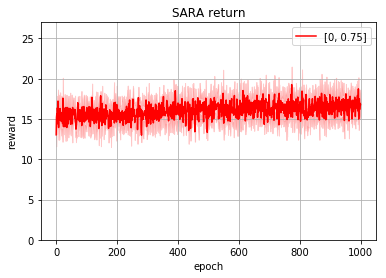

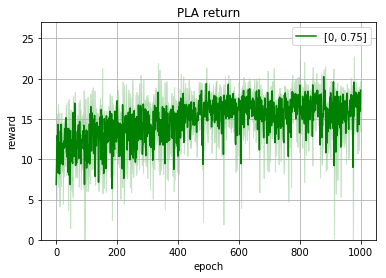

In [58]:
# Plot return
colors = ['r','g','b']
metric = "return"
modes = ["SARA","PLA"]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "[0, "+itv.replace("point","0.")+"]"
    plt.fill_between(data.index, data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(data.index, data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
    plt.ylim([0,27])
    plt.title('{} {}'.format(mode,metric))
    plt.xlabel("epoch")
    plt.ylabel("reward")
    plt.savefig('./plots_for_thesis/debug/ppo/{}_{}_{}.png'.format(itv,mode,metric), bbox_inches='tight')


### 2. V_mean

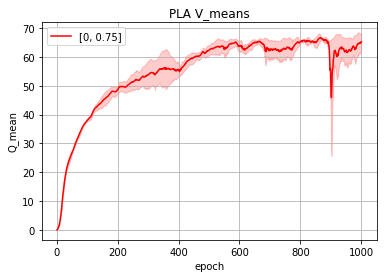

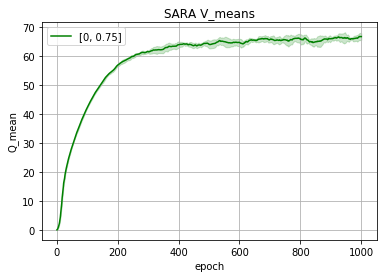

In [59]:
colors = ['r','g','b']
metric = "V_means"
modes = ["PLA","SARA"]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "[0, "+itv.replace("point","0.")+"]"
    plt.fill_between(np.linspace(1,1000,length), data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,1000,length), data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
#     plt.ylim([0,27])
    plt.title('{} {}'.format(mode,metric))
    plt.xlabel("epoch")
    plt.ylabel("Q_mean")
    plt.savefig('./plots_for_thesis/debug/ppo/{}_{}_{}.png'.format(itv,mode,metric), bbox_inches='tight')
    